In [2]:
# Importing Nessessory Libarires
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.feature_selection import VarianceThreshold

In [27]:
# Importing Dataset
import google.colab.files as files
uploaded = files.upload()
df = pd.read_csv('patient_data.csv')

display(df.head())
print(f" Inference: The shape of data is {df.shape}")

Saving patient_data.csv to patient_data (1).csv


,PatientID,Gender,Age,CholesterolLevel,BloodPressure,Region,RiskCategory
0,1,Male,37,193.4,129.4,East,High
1,2,Female,45,210.7,107.1,West,Low
2,3,Male,63,244.3,103.9,West,Low
3,4,Male,53,184.5,127.2,West,High
4,5,Male,29,175.7,116.6,South,High


 Inference: The shape of data is (100, 7)


In [28]:
df.info()
print(f"\033[1mInference:\033[0m Data seem to be free from Null values.") #use ANSI for bold the output INFERENCE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PatientID         100 non-null    int64  
 1   Gender            100 non-null    object 
 2   Age               100 non-null    int64  
 3   CholesterolLevel  100 non-null    float64
 4   BloodPressure     100 non-null    float64
 5   Region            100 non-null    object 
 6   RiskCategory      100 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 5.6+ KB
Inference: Data seem to be free from Null values.


# Question 1:
## Outlier Detection and Feature Reduction

In [26]:
# Feature Selections by droping constant features
selector = VarianceThreshold(threshold=0.0) # for removing constant features
constant_filtered = selector.fit_transform(df.select_dtypes(include=['float64','int64']))

selected_features = df.select_dtypes(include=['float64','int64']).columns[selector.get_support()]
reduced_df = df[selected_features].join(df.select_dtypes(include='object'))

print(f"\033[1mInference:\033[0m Removed constant features Remaining Columns: {reduced_df.shape[1]}")

# Identify and print removed constant features
removed_features = list(set(numeric_df.columns) - set(selected_features))
print(f"\033[1mRemoved Constant Features:\033[0m {removed_features}")

Inference: Removed constant features Remaining Columns: 7


NameError: name 'numeric_df' is not defined

In [8]:
# outlier Detection & removal on cholesterolLevel
Q1 , Q3 = np.percentile(reduced_df['CholesterolLevel'],[25,75]) # numpy method for qunatile

# Q1, Q3 = reduced_df['CholesterolLevel'].quantile([0.25,0.75]) # Pandas method for qunatile

# IQR  Range
IQR = Q3 - Q1
lower_bound = Q1 - (1.5*IQR)
upper_bound = Q3 + (1.5*IQR)

# Fltering Outliers out
df_clean = reduced_df[(df['CholesterolLevel'] >= lower_bound) & (df['CholesterolLevel'] <= upper_bound)]

print(f"\033[1mInference:\033[0m Removed Outliers from 'CholesterolLevel'. Rows reduced from {reduced_df.shape[0]} to {df_clean.shape[0]}.")

Inference: Removed Outliers from 'CholesterolLevel'. Rows reduced from 100 to 98.


In [9]:
# Cheking missing values
missing_summary = df_clean.isnull().sum()
missing_summary # No missing values present

,0
PatientID,0
Age,0
CholesterolLevel,0
BloodPressure,0
Gender,0
Region,0
RiskCategory,0


# Question 2:  Data Visualization

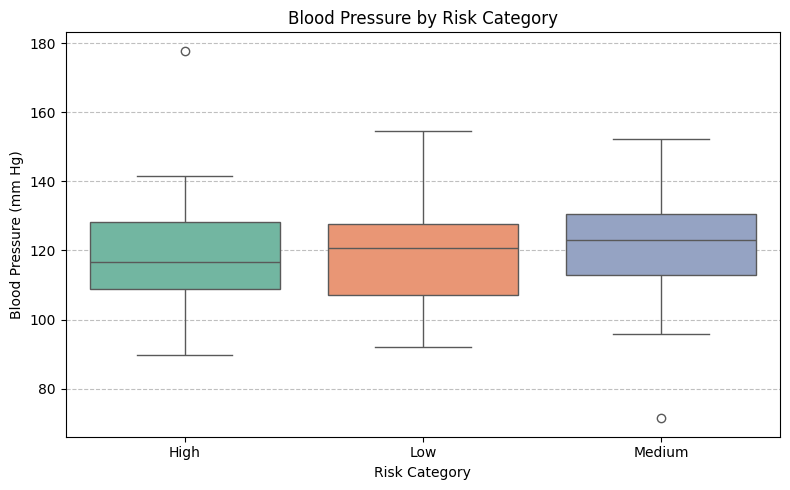

In [12]:
# Question 2
# boX Plot
plt.figure(figsize=(8,5))
sns.boxplot(data=df_clean, x = 'RiskCategory', y='BloodPressure', palette='Set2', hue='RiskCategory')

plt.title('Blood Pressure by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Blood Pressure (mm Hg)')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

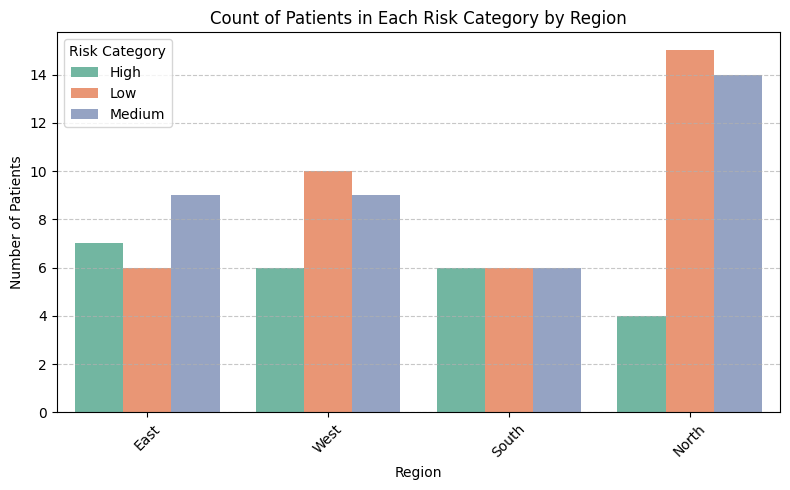

In [16]:
# 2 Count Plot RiskCateggory per region

plt.figure(figsize=(8,5))
sns.countplot(data=df_clean, x='Region', hue='RiskCategory', palette='Set2')

plt.title("Count of Patients in Each Risk Category by Region")
plt.xlabel('Region')
plt.ylabel('Number of Patients')
plt.legend(title='Risk Category')
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Question 3 Hypothesis testing
    - Test 1: Is the average CholesterolLevel significantly different from 200 mg/dl (sample size = 20)
*Null Hypothesis (H0)*: µ = 200    
*Alternate Hypothesis (H1)*: µ ≠ 200   
Use a *two-tailed t-test*

In [17]:
from scipy.stats  import ttest_1samp

# Takinf 20 random samples from cholesterolLevel
sample = df_clean['CholesterolLevel'].sample(20, random_state=42)

# Performing One-Sample t-test
t_stat , p_value = ttest_1samp(sample, popmean=200)

# Results
print(f"\033[1mT-Test Result:\033[0m \n T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

# Conlusion

if p_value < 0.05:
    print("\033[1mInferenceL\033[0m Reject H0  i.e The average cholesterol level is significanlty different from 200 mg/dL.")
else:
    print("\033[1mInference:\033[0m Failed to reject H0 i.e No significant difference from 200 mg/dL.")


T-Test Result: 
 T-Statistic: 1.1450, P-Value: 0.2664
Inference: Failed to reject H0 i.e No significant difference from 200 mg/dL.


## Test 2:
    Is there a significant relationship between Region & RiskCategoery?

**Null Hypothesis (H0)**: Region & RiskCategory are independent  
**Alternate Hypothesis (H1)**: There is a significant Relationship  
Using **Chi-square Test of Independence**

In [18]:
from scipy.stats import chi2_contingency

# Creating a contigency table
contingency_table = pd.crosstab(df_clean['Region'], df_clean['RiskCategory'])

# Observed Values
print("\033[1mOberserved Values\033[0m:")
display(contingency_table.values)


# Performing Chi-sqaure test
chi2 , p_val, dof, expected = chi2_contingency(contingency_table)

# results
print(f"\n\033[1mChi-square Test Result:\033[0m\nChi-Sqaure Statistic: {chi2:.4f}, P_Value: {p_val}, Degrees of Freedom: {dof}")


# Conclusion
if p_val < 0.05:
    print("\033[1mInference:\033[0m Reject H0 i.e There is a significant relationship between Region & Risk Category.")
else:
    print("\033[1mInference:\033[0m Failed to reject H0 i.e There is not significant relationship between Region & Risk Category.")

Oberserved Values:


array([[ 7,  6,  9],
       [ 4, 15, 14],
       [ 6,  6,  6],
       [ 6, 10,  9]])


Chi-square Test Result:
Chi-Sqaure Statistic: 4.8247, P_Value: 0.5664877563797075, Degrees of Freedom: 6
Inference: Failed to reject H0 i.e There is not significant relationship between Region & Risk Category.


# Question 04:

Model the progression of a patient's medication in the bloodstream.
Equation:
 dC/dt = k(D - C)
Where:
- k = 0.1, D = 100, C(0) = 0
- Solve this ODE for t = 0 to 50 using both odeint and solve_ivp
- Plot the result and explain the difference in output between the two solvers, if any.

In [19]:
# Defining the ODE system
from scipy.integrate import odeint, solve_ivp


# Constants
k =0.1
D = 100

# ODE function
def dc_dt(C, t):
    return k * (D-C)


# Solving using odeint

# time vector
t = np.linspace(0,50,200)

# initial condition
C0 = 0

# Solve ODe
c_odeint = odeint(dc_dt, C0, t)

In [21]:
# Solving using solve_ivp

def dc_dt_ivp(t,C):
    return k * (D - C)

# Solve ODE
sol_ivp = solve_ivp(dc_dt_ivp, t_span=[0,50], y0=[0], t_eval=t)
# print(sol_ivp)


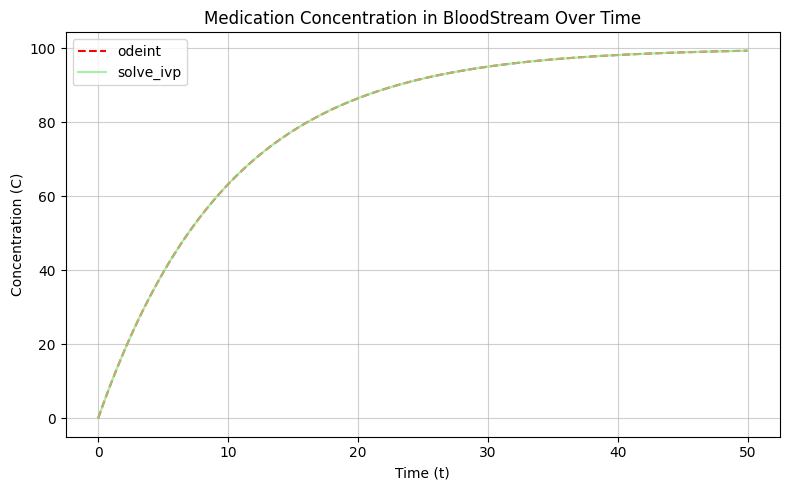

In [25]:
plt.figure(figsize=(8,5))
plt.plot(t, c_odeint, label='odeint', linestyle='--', color='red')
plt.plot(sol_ivp.t, sol_ivp.y[0], label='solve_ivp', linestyle='-', color='lightgreen', alpha=0.8)
plt.title("Medication Concentration in BloodStream Over Time")
plt.xlabel("Time (t)")
plt.ylabel("Concentration (C)")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.tight_layout()
plt.show()


# As we can see both Methods Produces Almost Identical Results For This ODE.